In [2]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import train_test_split
import cv2
from pathlib import Path
data_folder = Path("data/")

#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics
from keras.callbacks import History 

In [3]:
#train = pd.read_csv("data/emnist-balanced-train.csv",delimiter = ',')
#test = pd.read_csv("data/emnist-balanced-test.csv", delimiter = ',')
train_x, train_y = loadlocal_mnist(images_path=data_folder/"emnist-byclass-train-images-idx3-ubyte",
                                   labels_path=data_folder/"emnist-byclass-train-labels-idx1-ubyte")
test_x, test_y   = loadlocal_mnist(images_path=data_folder/"emnist-byclass-test-images-idx3-ubyte",
                                   labels_path=data_folder/"emnist-byclass-test-labels-idx1-ubyte")
mapp = pd.read_csv("data/emnist-byclass-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None).squeeze("columns")
#print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))

In [4]:
# Constants
HEIGHT = 28
WIDTH = 28

In [5]:
# Split x and y
#train_x = train.iloc[:,1:]
#train_y = train.iloc[:,0]
#del train

#test_x = test.iloc[:,1:]
#test_y = test.iloc[:,0]
#del test

In [6]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(697932, 784) (697932,) (116323, 784) (116323,)


In [7]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [8]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (697932, 28, 28)
test_x: (116323, 28, 28)


In [9]:
# Normalise
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255


ValueError: num must be 1 <= num <= 27, not 0

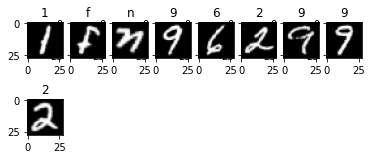

In [12]:
# plot image
for i in range(50, 60):
    plt.subplot(330 + (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(chr(mapp[train_y[i]]))

In [25]:
# number of classes
#num_classes = np.unique(train_y)
num_classes=67

In [26]:
# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (697932, 67)
test_y:  (116323, 67)


In [27]:
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [28]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)

In [29]:
# Building model
# ((Si - Fi + 2P)/S) + 1
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, epochs=10, batch_size=512, verbose=1, \
                    validation_data=(val_x, val_y))

Epoch 1/10
1227/1227 [==============================] - 618s 503ms/step - loss: 0.8248 - accuracy: 0.7528 - val_loss: 0.4348 - val_accuracy: 0.8449
Epoch 2/10
1227/1227 [==============================] - 575s 469ms/step - loss: 0.5225 - accuracy: 0.8248 - val_loss: 0.4112 - val_accuracy: 0.8520
Epoch 3/10
1227/1227 [==============================] - 569s 464ms/step - loss: 0.4811 - accuracy: 0.8362 - val_loss: 0.3933 - val_accuracy: 0.8578
Epoch 4/10
1227/1227 [==============================] - 607s 494ms/step - loss: 0.4582 - accuracy: 0.8417 - val_loss: 0.3840 - val_accuracy: 0.8596
Epoch 5/10
1227/1227 [==============================] - 597s 487ms/step - loss: 0.4419 - accuracy: 0.8463 - val_loss: 0.3761 - val_accuracy: 0.8633
Epoch 6/10
1227/1227 [==============================] - 631s 515ms/step - loss: 0.4296 - accuracy: 0.8494 - val_loss: 0.3733 - val_accuracy: 0.8650
Epoch 7/10
 648/1227 [==============>...............] - ETA: 4:41 - loss: 0.4226 - accuracy: 0.8516

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

In [ ]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

In [ ]:
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))